# The History of Feminism

It is widely discussed in 2023 that the inequality between men and women is around everywhere in terms of salary and job opportunities in the workplaces, the political movement, and so on. Feminism has the position that male point of view is prioritized, and for most of the time, females are treated in an unjust way. 

But how was it in the long history? 

how did authors think and express their emotions to advance the rights and social status of women? 

What did they have in common and how are they different? 





All of these quesions would be answered in this analysis by exploring dataset. Wollstonecraft, Davis, and Beauvoir are discussed in this story, and the analysis is compiled based the History of Philosophy dataset on Kaggle. 

In [1]:
# Load the packages that need to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
import wordcloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex
from platform import platform
import re

In [2]:
# nltk.downloader.download('vader_lexicon')

In [2]:
# Create a general path for future reproducibility 
path = "/Users/oliviaz/Documents/GitHub/ads-spring2023-project1-mmmzzss"

df_raw = pd.read_csv(path + "/data/philosophy_data.csv")

# Explortary Data Analysis - Whole Dataset

### Author: Jingshu Zhang 
### UNI: jz3552

##### Data Preprocessing and Checking

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


##### From the info we have above, the values in all the columns are non-null and therefore make sure that the dataset is complete

## Frequency of authors and schools - Degree of influence

##### We look at the number of frequency of publication across authors and schools to see the contribution by using matplotlib and seaborn library.

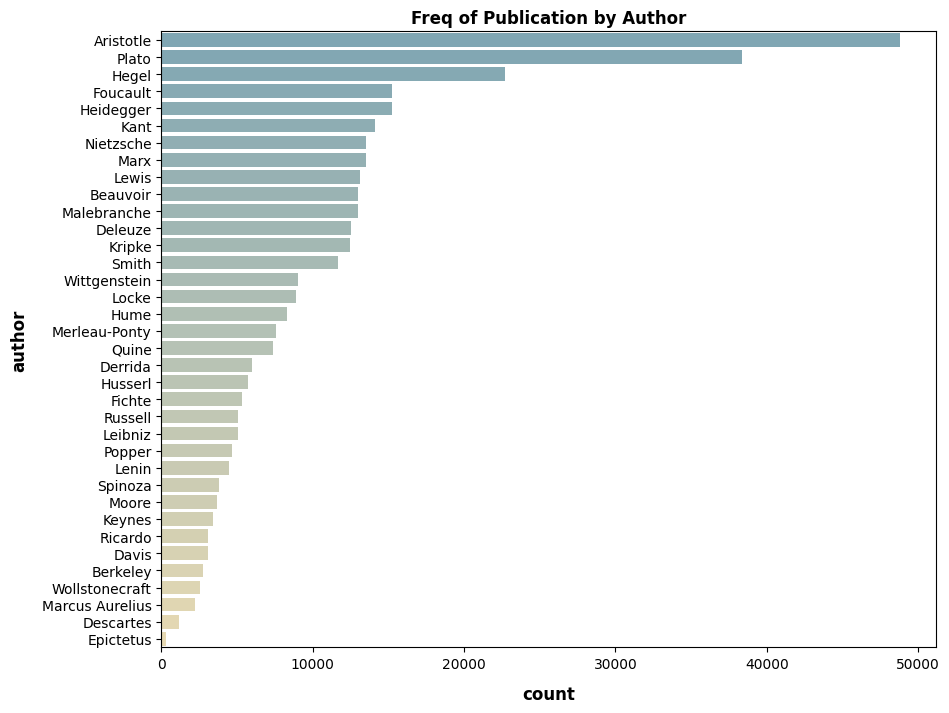

In [4]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
plt.title('Freq of Publication by Author',fontweight = 'bold')
ax.set_xlabel('Count', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('Author', fontsize=12, labelpad=10, fontweight='bold')
sns.countplot(y = 'author', data = df_raw, order = df_raw['author'].value_counts().index, palette = 'blend:#7AB,#EDA')

plt.savefig(path + '/figs/Freq_By_Author.jpg');

It can be seen that Aristotle and Plato contributed most compared to other authors, and it has a nearly 1000-fold between most-contributed and least contributed authors.

/var/folders/82/wzfhn24j3k1_5t_bv7qglk4r0000gn/T/ipykernel_14128/58539278.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_xticklabels(), rotation=45, size = 10)


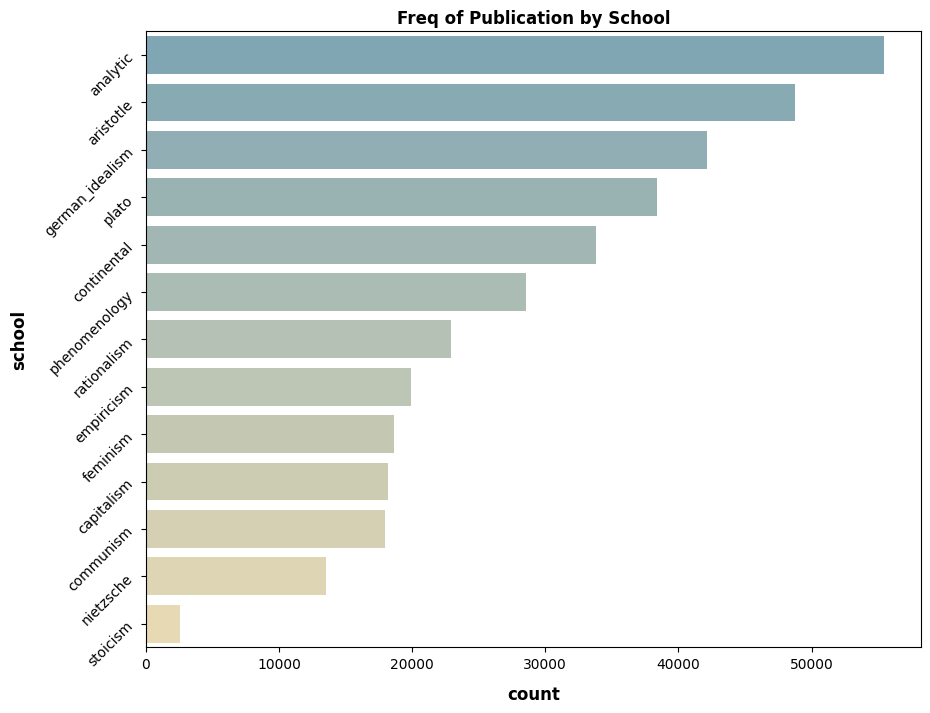

In [5]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
plt.title('Freq of Publication by School',fontweight = 'bold')
ax.set_yticklabels(ax.get_xticklabels(), rotation=45, size = 10)
ax.set_xlabel('Count', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('School', fontsize=12, labelpad=10, fontweight='bold')
sns.countplot(y = 'school', data = df_raw, order = df_raw['school'].value_counts().index, palette = 'blend:#7AB,#EDA')

plt.savefig(path + '/figs/Freq_By_School.jpg');

Analytics and German idealism are mostly discussed within the given dataset. Aristotle and Plato should be excluded in this case since they are authors instead of the schools.

## Average length of sentences across Authors and Schools - Writing style

##### The average length of sentences is visualized to find the different writing style - verbose or concise

In [6]:
df_senten_avglength = df_raw.groupby(['author'])['sentence_length'].mean().reset_index()
df_senten_avglength.head(10)

,author,sentence_length
0,Aristotle,153.224953
1,Beauvoir,148.790351
2,Berkeley,139.653987
3,Davis,139.671134
4,Deleuze,163.671850
5,Derrida,143.431239
6,Descartes,247.381625
7,Epictetus,118.430341
8,Fichte,151.964582
9,Foucault,189.637467


/var/folders/82/wzfhn24j3k1_5t_bv7qglk4r0000gn/T/ipykernel_14128/2514378449.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size = 10)


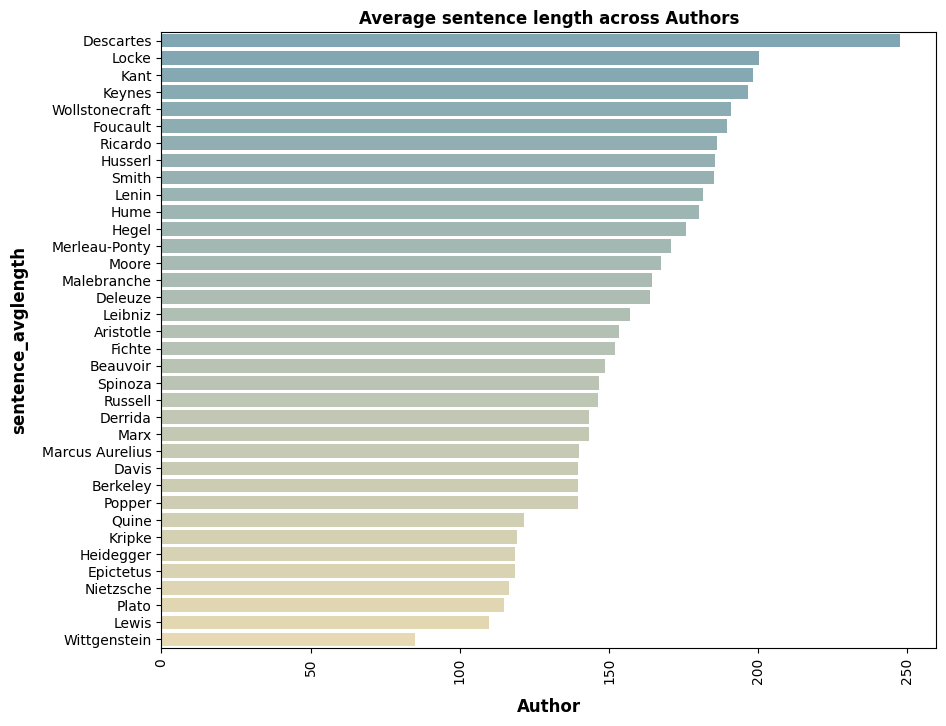

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sns.barplot(y = 'author', x = 'sentence_length', data = df_senten_avglength, order= df_senten_avglength.sort_values('sentence_length', ascending=False).author,palette = 'blend:#7AB,#EDA')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size = 10)
ax.set_xlabel('Author', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('sentence_avglength', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Average sentence length across Authors', fontweight = 'bold')

plt.savefig(path + '/figs/Avgsentlen_Author.jpg');

In [8]:
avgsentlen_school = df_raw.groupby(['school'])['sentence_length'].mean().reset_index()
avgsentlen_school.head(10)

,school,sentence_length
0,analytic,119.025205
1,aristotle,153.224953
2,capitalism,187.576289
3,communism,152.752311
4,continental,171.792060
5,empiricism,183.638051
6,feminism,153.083928
7,german_idealism,180.251329
8,nietzsche,116.599867
9,phenomenology,145.913345


/var/folders/82/wzfhn24j3k1_5t_bv7qglk4r0000gn/T/ipykernel_14128/1341849254.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, size = 8)


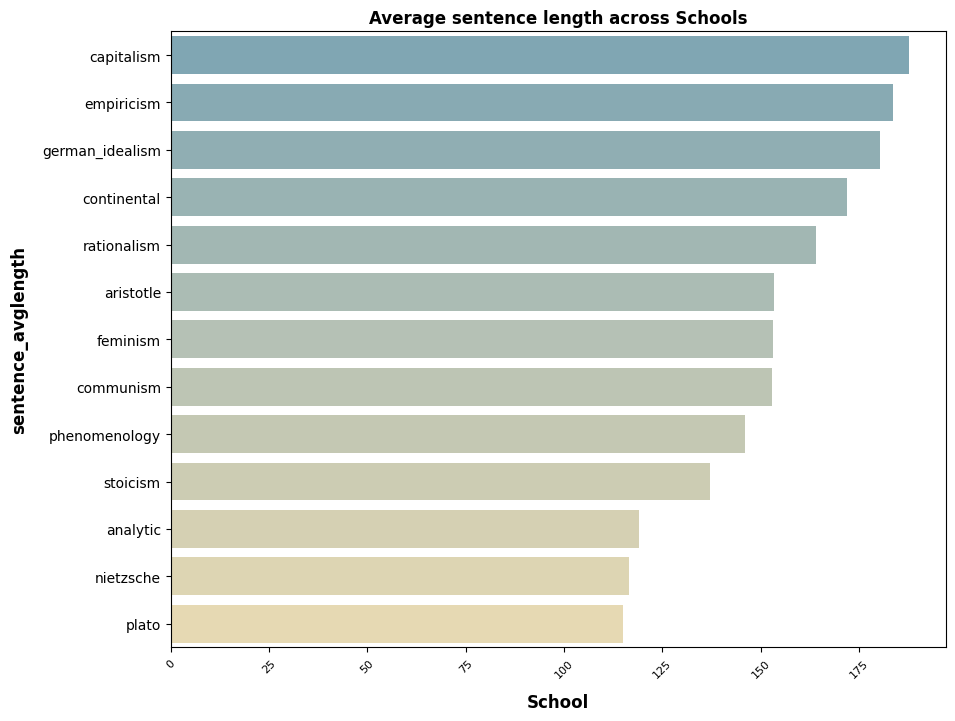

In [9]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sns.barplot(y = 'school', x = 'sentence_length', data = avgsentlen_school, order= avgsentlen_school.sort_values('sentence_length', ascending=False).school,palette = 'blend:#7AB,#EDA')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, size = 8)
ax.set_xlabel('School', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('sentence_avglength', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Average sentence length across Schools', fontweight = 'bold')

plt.savefig(path + '/figs/Avgsentlen_Schools.jpg');

## Compound Sentiment Score by School over time

##### Only looking at some basic characteristics of the author and school might not be enough to deeply understand the feminism, so I decided to explore the compound store in different schools.

##### This code performs sentiment analysis on the sentences in the 'sentence_str' column of the 'df_raw' dataframe using the SentimentIntensityAnalyzer from the nltk package. The sentiment analysis is performed by calculating the negative, neutral, positive, and a compound score which ranges from -1  to 1. The compound score is a metric that represents the overall sentiment of the sentence
##### Additionally, the 'sentence_spacy','corpus_edition_date','sentiment_scores' , and 'sentiment_lowered'columns are also dropped as they are no longer in use.

In [10]:
sia = SentimentIntensityAnalyzer()

# Create a new column to store the sentiment scores
df_raw['sentiment_scores'] = df_raw['sentence_str'].apply(lambda x: sia.polarity_scores(x))

# Extract the values from the sentiment_scores dictionary and assign them to new columns
# Compound score ranges from -1 (neg) through 0 (neu) to 1 (pos) and we only keep the compound_score col for future analysis
df_raw['compound_score'] = df_raw['sentiment_scores'].apply(lambda x: x['compound'])

# Delete irrelavant columns
df_raw.drop(columns=['sentence_spacy','corpus_edition_date','sentiment_scores', 'sentence_lowered'], inplace=True)

# Rename 'original_publication_date' column to 'year' for easy operation
df_raw.rename(columns = {'original_publication_date':'year'}, inplace = True)

df_raw.head(10)

,title,author,school,sentence_str,year,sentence_length,tokenized_txt,lemmatized_str,compound_score
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...",-350,125,"['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea...",-0.2960
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,-350,69,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...,0.4404
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,-350,74,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...,-0.3346
3,Plato - Complete Works,Plato,plato,What is this you say?,-350,21,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?,0.0000
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...",-350,101,"['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ...",0.0000
5,Plato - Complete Works,Plato,plato,But someone else has indicted you?,-350,34,"['but', 'someone', 'else', 'has', 'indicted', ...",but someone else have indict -PRON- ?,0.0000
6,Plato - Complete Works,Plato,plato,"I do not really know him myself, Euthyphro.",-350,43,"['do', 'not', 'really', 'know', 'him', 'myself...","-PRON- do not really know -PRON- -PRON- , Eut...",0.0000
7,Plato - Complete Works,Plato,plato,He is apparently young and unknown.,-350,35,"['he', 'is', 'apparently', 'young', 'and', 'un...",-PRON- be apparently young and unknown .,0.0000
8,Plato - Complete Works,Plato,plato,"They call him Meletus, I believe.",-350,33,"['they', 'call', 'him', 'meletus', 'believe']","-PRON- call -PRON- Meletus , -PRON- believe .",0.0000
9,Plato - Complete Works,Plato,plato,"He belongs to the Pitthean deme, if you know a...",-350,147,"['he', 'belongs', 'to', 'the', 'pitthean', 'de...","-PRON- belong to the Pitthean deme , if -PRON...",0.0000


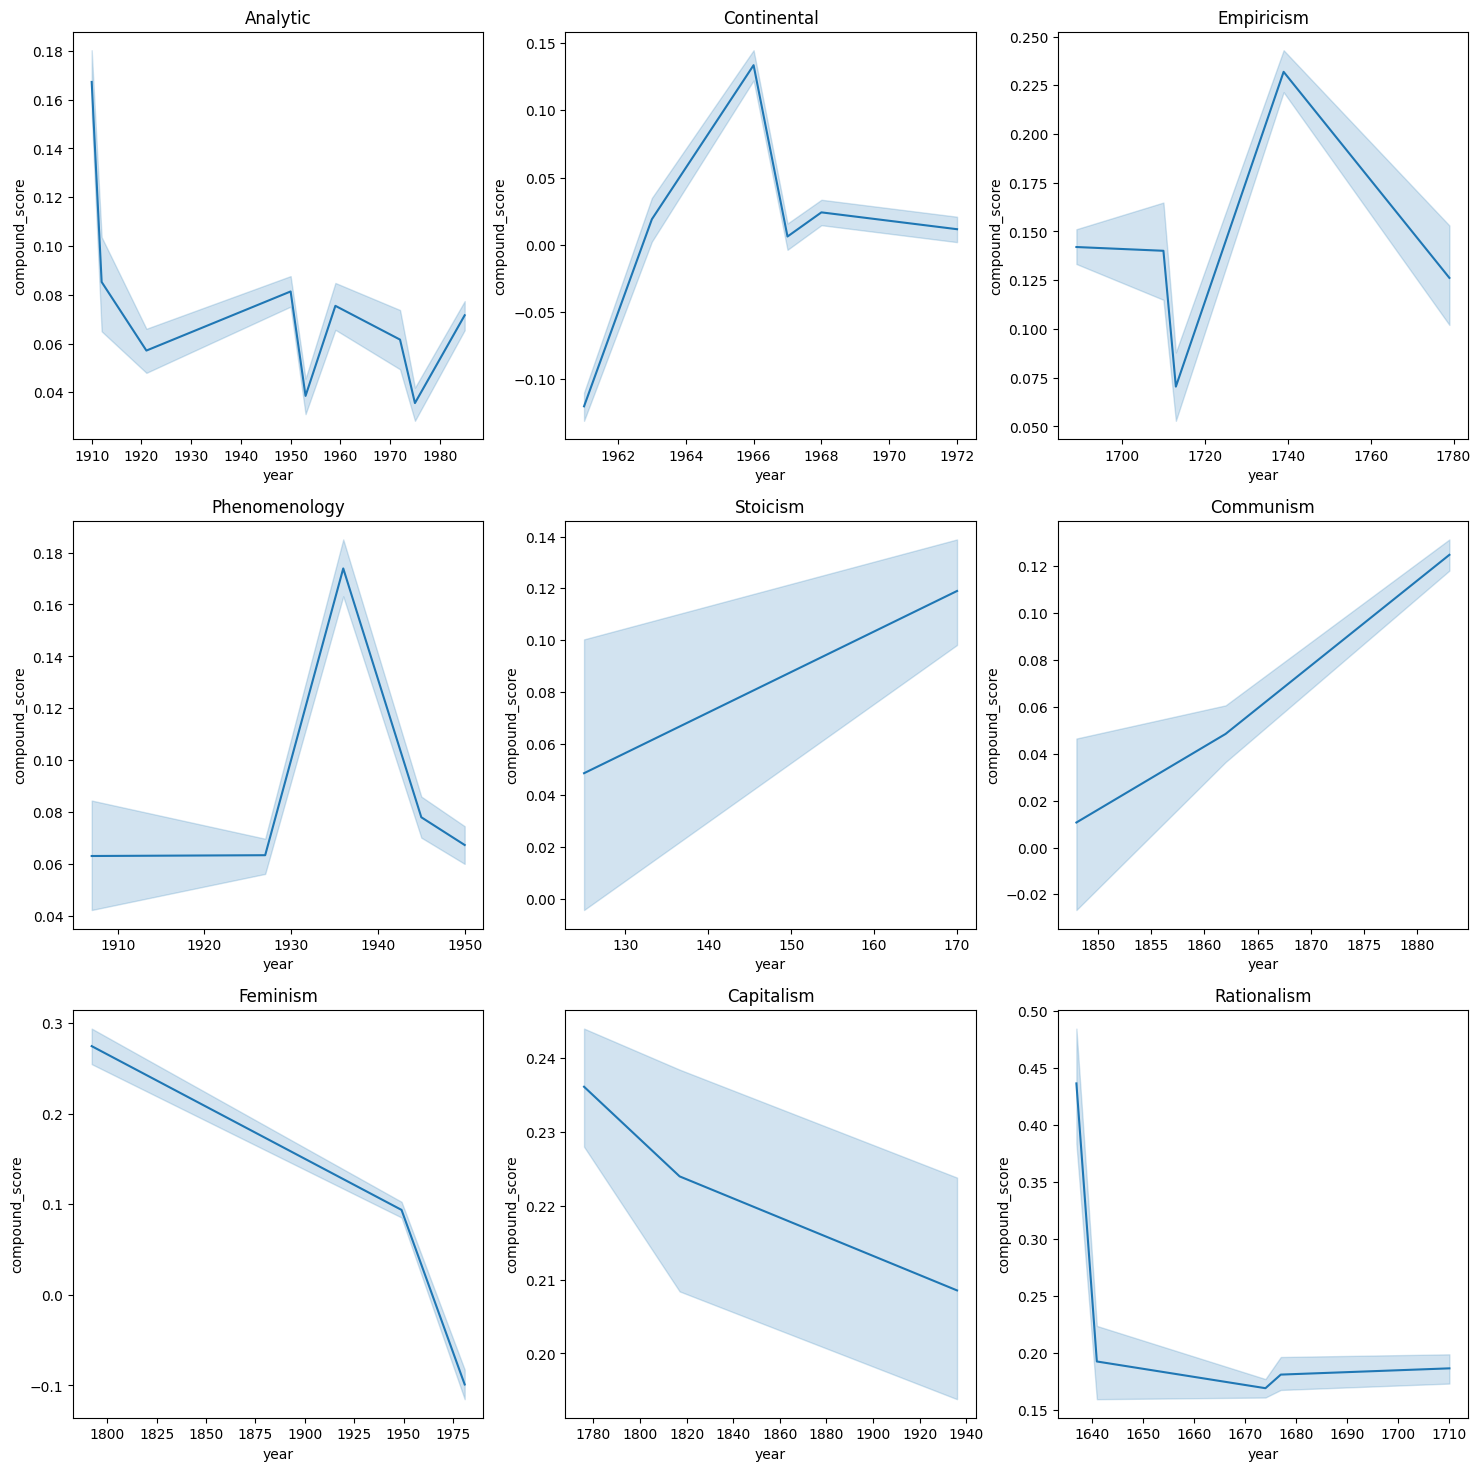

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

axes[0,0].set_title('Analytic');
axes[0,1].set_title('Continental');
axes[0,2].set_title('Empiricism');
axes[1,0].set_title('Phenomenology');
axes[1,1].set_title('Stoicism');
axes[1,2].set_title('Communism');
axes[2,0].set_title('Feminism');
axes[2,1].set_title('Capitalism');
axes[2,2].set_title('Rationalism');


sns.lineplot(ax = axes[0,0], x='year', y= 'compound_score', data = df_raw[df_raw['school'] == 'analytic']);
sns.lineplot(ax = axes[0,1], x='year', y= 'compound_score', data = df_raw[df_raw['school'] == 'continental']);
sns.lineplot(ax = axes[0,2], x='year', y= 'compound_score', data = df_raw[df_raw['school'] == 'empiricism']);
sns.lineplot(ax = axes[1,0], x='year', y= 'compound_score', data = df_raw[df_raw['school'] == 'phenomenology']);
sns.lineplot(ax = axes[1,1], x='year', y= 'compound_score', data = df_raw[df_raw['school'] == 'stoicism']);
sns.lineplot(ax = axes[1,2], x='year', y= 'compound_score', data = df_raw[df_raw['school'] == 'communism']);
sns.lineplot(ax = axes[2,0], x='year', y= 'compound_score', data = df_raw[df_raw['school'] == 'feminism']);
sns.lineplot(ax = axes[2,1], x='year', y= 'compound_score', data = df_raw[df_raw['school'] == 'capitalism']);
sns.lineplot(ax = axes[2,2], x='year', y= 'compound_score', data = df_raw[df_raw['school'] == 'rationalism']);

plt.savefig(path + '/figs/Sentiment_score_overtime.jpg');

##### I noticed that Feminism is the only one whose compound score is still below -0.05 and regard as negative up until the most recent publication. It attracts me to further examine how the author express and what they cover in their publications. The rest of other schools hold a relatively positive sentiment except for the continental being neutral.

# Exploratory Data Analysis - School of Feminism

## Who contributes to feminism?¶

##### First look at who are the contributors to Feminism by filtering the dataset with school being feminism

In [12]:
df_fem = df_raw[df_raw['school'] == 'feminism']
df_fem[df_fem.school=='feminism'][['year','author','title']].drop_duplicates()

,year,author,title
342173,1792,Wollstonecraft,Vindication Of The Rights Of Woman
344732,1949,Beauvoir,The Second Sex
357749,1981,Davis,"Women, Race, And Class"


##### There are total three authors contributing to the development of feminism since late 18 century.
##### The authors were Mary Wollstonecraft, Simone de Beauvoir and Angela Davis. a set includes one book for each author. Mary Wollstonecraft wrote the book called «Vindication of its of Woman" in 1792. Simone de Beauvoir wrote "The Second Sex" in 1949 and Angela Davis wrote "Women, Race, And Class" in 1981.

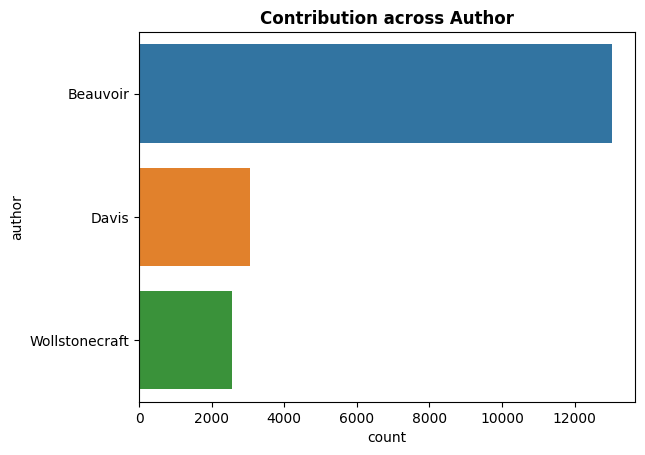

In [13]:
sns.barplot(y = 'author', x = 'count', data = df_fem.groupby(['author']).size().to_frame('count').reset_index())
ax.set_xlabel('Author', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Contribution across Author', fontweight = 'bold')

plt.savefig(path + '/figs/Fem_contribution_Author.jpg');

##### Beauvoir had the greatest contribution to the feminism relative to that of other authors by counting the frequency of publication. The number of publication of Davis and Wollstonecraft is basically the same

## What sentiments did each author have?

In [14]:
# Create a new column to store the categorical result by divding the compound score
senti_ana = []

for score in df_fem['compound_score']:
    if score >= 0.05:
        senti_ana.append('positive')
    elif score <= -0.05 :
        senti_ana.append('negative')
    else:
        senti_ana.append('neutral')

df_fem['senti_ana'] = senti_ana

/var/folders/82/wzfhn24j3k1_5t_bv7qglk4r0000gn/T/ipykernel_14128/830503385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fem['senti_ana'] = senti_ana


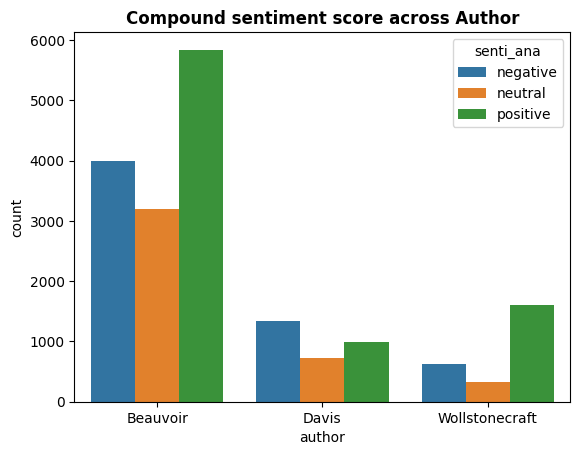

In [15]:
sns.barplot(x = 'author', y = 'count', hue = 'senti_ana', data = df_fem.groupby(['author', 'senti_ana']).size().to_frame('count').reset_index())
ax.set_xlabel('Author', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Compound sentiment score across Author', fontweight = 'bold')

plt.savefig(path + '/figs/Fem_sentiana_Author.jpg');

##### Still, the sentiments from Beauvoir seems more than the sum of that of Davis and Wollstoncraft. From this plot, it can be seen that both Beauvoir and Wollstonecraft expressed positive sentiments more than negative sentiments. It is probably because that there are less sentiments expressed by Davis.  For all of these three authors, neutral sentiments were the least expressed. Davis hold much more negative positions on the feminism.

##### The difference between negative and positive sentiments is significant in Wollstonecraft's work, with positive sentiments being doubling negative sentiments and two times more than neutral sentiments. Wollstonecrafy might have the strong position on the process of feminism

##### In contrast, the margin between negative, positive, and neutral is quiet low. The margin is quite low between negative and positive sentiments expressed which means Davis basically expressed in an equal way

##### Let us look at what specific emotions they were trying to say in each case.

## How did they feel with feminism?

In [ ]:
# nltk.download('punkt')

In [16]:
# Using NRCLex to get emotions of each sentence in the df_fem
# Create an empty list to store the emotion labels
emotion_labels = []

# Go Iterate through the rows of the dataframe df_fem
for i, row in df_fem.iterrows():
    
  # Get the lemmatized text
  lemmatized_text = row['lemmatized_str']

  # Create an NRCLex object for the text
  emotion = NRCLex(lemmatized_text)

  # Get the first emotion for the text
  first_emotion = emotion.top_emotions

  # Append the top emotion label to the list
  emotion_labels.append(first_emotion)


In [17]:
# Create a new list to store most related emotions
emotions = []

for emotion in emotion_labels:
  # Extract emotion from the emotion tuple
  main_emotion = emotion[0][0]

  # Append emotion to the list
  emotions.append(main_emotion)
  
df_fem['emotions'] = emotions

/var/folders/82/wzfhn24j3k1_5t_bv7qglk4r0000gn/T/ipykernel_14128/1337507131.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fem['emotions'] = emotions


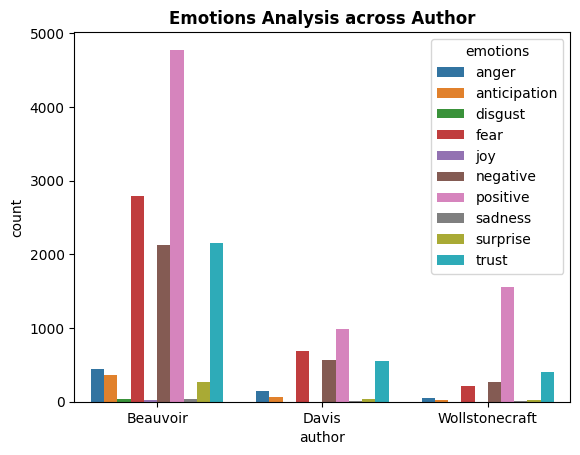

In [18]:
sns.barplot(x = 'author', y = 'count', hue = 'emotions', data = df_fem.groupby(['author', 'emotions']).size().to_frame('count').reset_index())
ax.set_xlabel('Author', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Emotions Analysis across Author', fontweight = 'bold')

plt.savefig(path + '/figs/Fem_emotions_Author.jpg');

##### This plot shows that fear and trust are the most frequent emotions expressed by all of the three authors except for the sentiments of positive and negative. All of them had anger more than anticipation.

##### Beauvoir has some surprise which is rarely seen in other two authors. None of these three authors has joy emotions with respect to feminism.

## What Topics did they mention to lead to respective emotions?

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliviaz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# write function to find the top 10 most frequent word across author
# Flatten -- Join all string except for the stop words-- count the words
def processStrings(token_string):
    return re.sub(r'[\'\[\]]', '', token_string).split(', ')

def processTokens(token_text):
    flatten_df = token_text.to_numpy().flatten()
    joined_df = ', '.join(flatten_df)
    
    filtered_sentence = []
    word_tokens = processStrings(joined_df)
    
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

def getWordCounts(filtered_sentence):
    return pd.Series(filtered_sentence).value_counts()

### WordCloud -- Beauvoir

##### The same process repeats three times to plot wordcloud for three authors

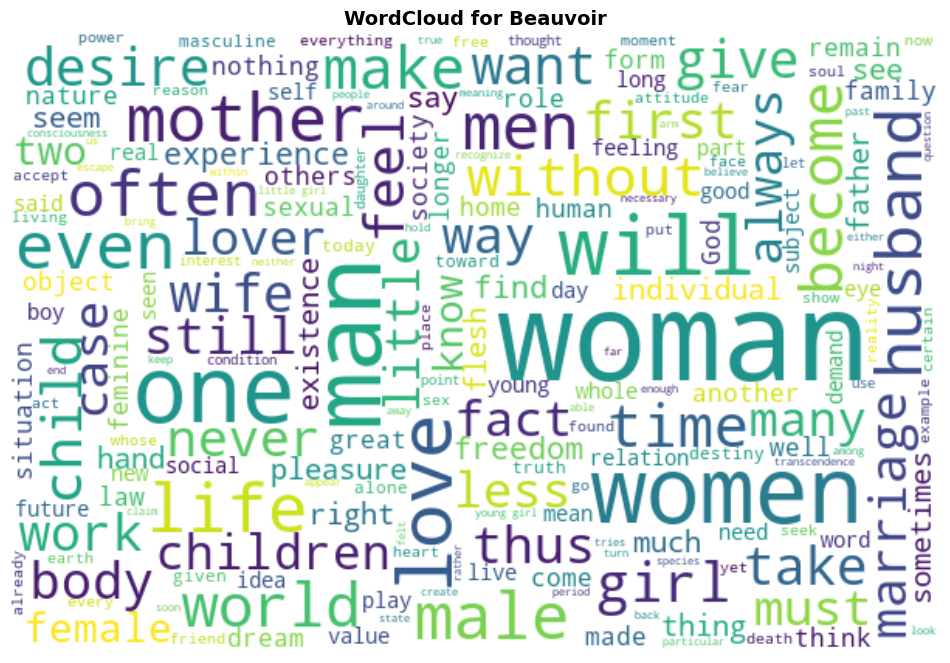

In [21]:
# Wordcloud for Beauvoir
# create an empty string to store all the sentences
all_sentences = ' '.join(df_fem[df_fem['author'] == 'Beauvoir']['sentence_str'])


wordcloud = WordCloud(max_font_size=80, width=600, height=400, background_color = 'white').generate(all_sentences)

# plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Beauvoir', fontsize=14, fontweight='bold')
plt.savefig(path + "/figs/Wordcloud_Beauvoir.png")
plt.show()


##### Other than word related to gender like women, men and so on, the word love, desire, mother, time, pleasure, world, and body are at a high frequency. We might summarize that the topic of her work is about discussing the relationship and role in marriage and how it is related to the whole world and society. 

##### It is not surprised to see some of these words given that we have already noticed that Beauvoir has some surprise emotion in her publication. In general, it is along the way that she has more positive sentiments than negative sentiments since we barely see any perssimistic words. 

In [22]:
processed_Bea = processTokens(df_fem[df_fem.author=='Beauvoir'].tokenized_txt)
Beauvoir_wcounts = getWordCounts(processed_Bea)
Bead_df = Beauvoir_wcounts.to_frame().reset_index()
Bead_df.columns=['Word','Frequency']
Bead_df[0:10]

,Word,Frequency
0,woman,2667
1,man,1468
2,women,1402
3,one,1357
4,love,810
5,life,776
6,even,654
7,men,643
8,like,632
9,would,626


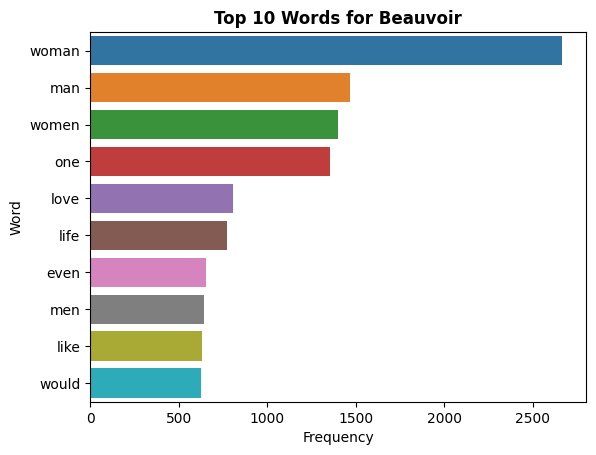

In [23]:
sns.barplot(x = 'Frequency', y = 'Word', data = Bead_df[0:10])
ax.set_xlabel('Frequency', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('Word', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Top 10 Words for Beauvoir', fontweight = 'bold')

plt.savefig(path + '/figs/Top10_Beauvoir.jpg');

### WordCloud for Davis

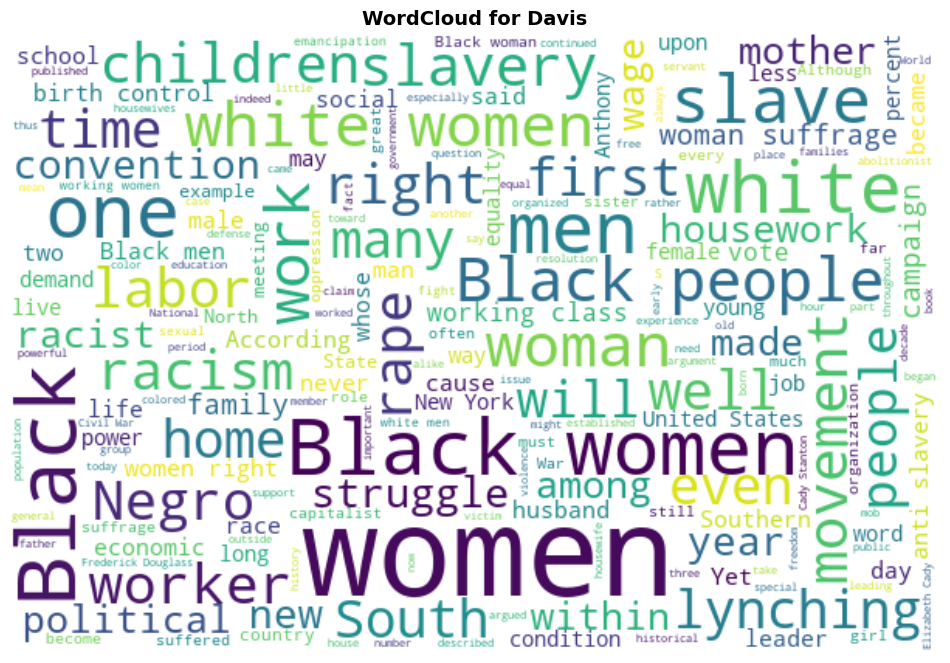

In [24]:
# Wordcloud for Davis
# create an empty string to store all the sentences
all_sentences = ' '.join(df_fem[df_fem['author'] == 'Davis']['sentence_str'])

wordcloud = WordCloud(max_font_size=80, width=600, height=400, background_color = 'white').generate(all_sentences)

# plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Davis', fontsize=14, fontweight='bold')
plt.savefig(path + "/figs/Wordcloud_Davis.png")
plt.show()

##### From high frequency work of Davis, black, white, movement, worker, slave, south, rape and struggle, it is not hard to conclude that her work is more about the gender inequality across color and area. It makes more sense for Davis to be more negative than positive with considering another dimension of racial problem together with gender inequality

In [25]:
processed_Dav = processTokens(df_fem[df_fem.author=='Davis'].tokenized_txt)
Davis_wcounts = getWordCounts(processed_Dav)
Dav_df = Davis_wcounts.to_frame().reset_index()
Dav_df.columns=['Word','Frequency']
Dav_df[0:10]

,Word,Frequency
0,women,1228
1,black,697
2,white,416
3,men,274
4,woman,263
5,people,214
6,slavery,192
7,one,185
8,movement,169
9,would,164


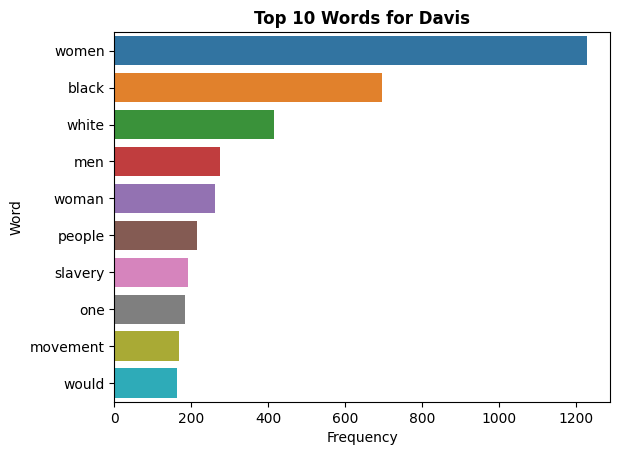

In [26]:
sns.barplot(x = 'Frequency', y = 'Word', data = Dav_df[0:10])
ax.set_xlabel('Frequency', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('Word', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Top 10 Words for Davis', fontweight = 'bold')

plt.savefig(path + '/figs/Top10_Davis.jpg');

### WordCloud for Wollstonecraft

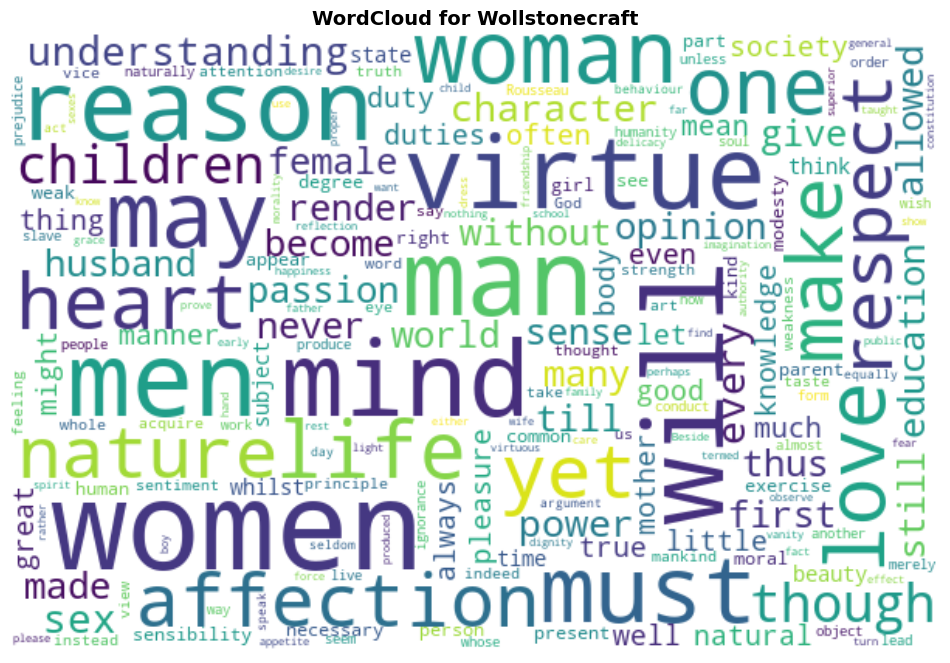

In [27]:
# Wordcloud for Wollstonecraft
# create an empty string to store all the sentences
all_sentences = ' '.join(df_fem[df_fem['author'] == 'Wollstonecraft']['sentence_str'])

# create a wordcloud object
wordcloud = WordCloud(max_font_size=80, width=600, height=400, background_color = 'white').generate(all_sentences)

# plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Wollstonecraft', fontsize=14, fontweight='bold')
plt.savefig(path + "/figs/Wordcloud_Woll.png")
plt.show()

##### As it can be seen from the word cloud, reason, mind, virtue, love, heart, life, and children are mostly used words except for gender words. It might be concluded that Wollstonecraft paid more attention to the life and trying to find the intuition behind them. These words express a feeling of being optimistic towards life, which is consistent with her sentiments. 

In [28]:
processed_Woll = processTokens(df_fem[df_fem.author=='Wollstonecraft'].tokenized_txt)
Woll_wcounts = getWordCounts(processed_Woll)
woll_df = Woll_wcounts.to_frame().reset_index()
woll_df.columns=['Word','Frequency']
woll_df[0:10]

,Word,Frequency
0,women,441
1,man,311
2,men,299
3,reason,261
4,mind,230
5,would,228
6,may,224
7,must,221
8,woman,195
9,virtue,195


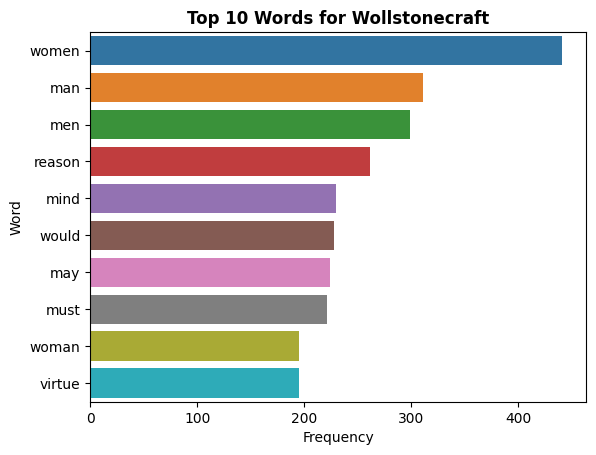

In [29]:
sns.barplot(x = 'Frequency', y = 'Word', data = woll_df[0:10])
ax.set_xlabel('Frequency', fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('Word', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Top 10 Words for Wollstonecraft', fontweight = 'bold')

plt.savefig(path + '/figs/Top10_Woll.jpg');

##### [Summary] What did they express in common and how were they different?

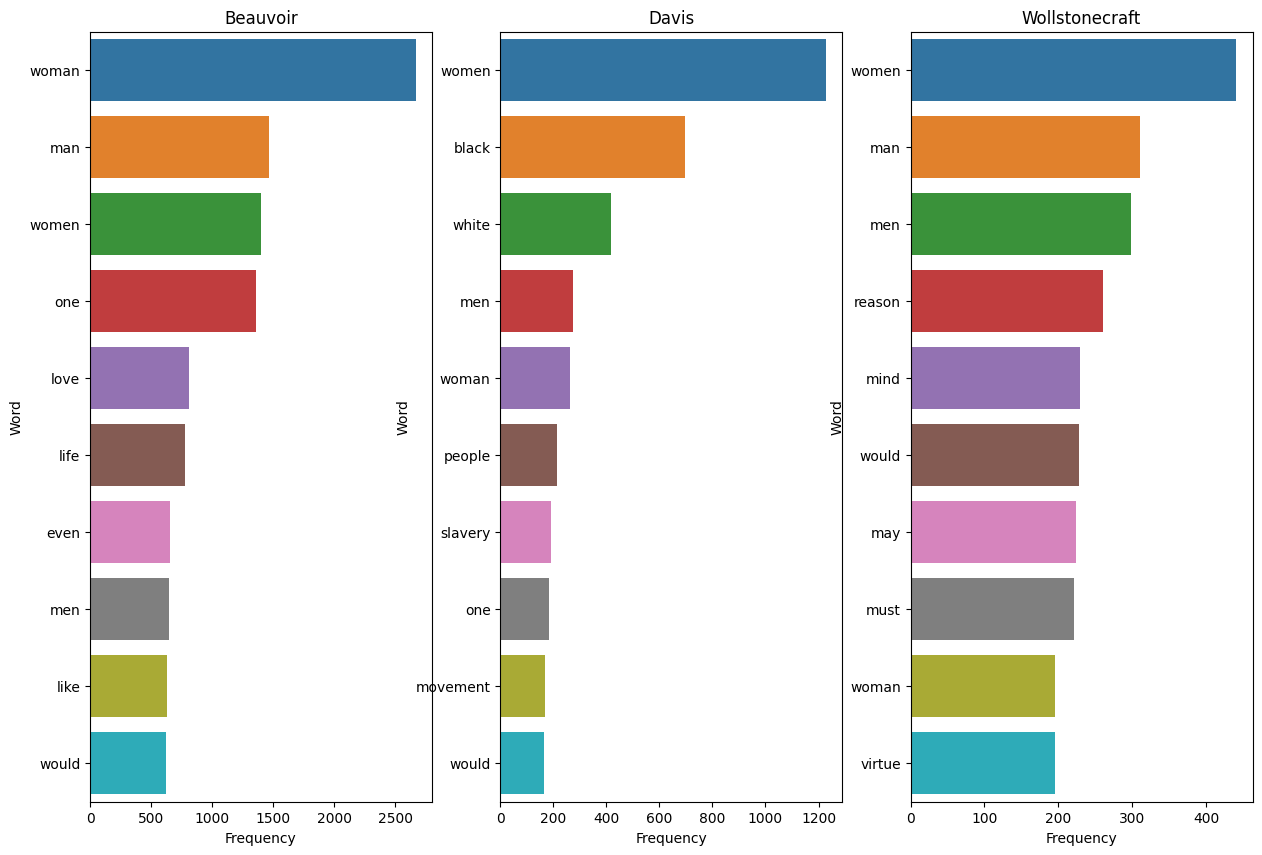

In [30]:
fig, axes = plt.subplots(1,3, figsize=(15, 10))

axes[0].set_title('Beauvoir');
axes[1].set_title('Davis');
axes[2].set_title('Wollstonecraft');


sns.barplot(ax = axes[0], x='Frequency', y= 'Word', data = Bead_df[0:10]);
sns.barplot(ax = axes[1], x='Frequency', y= 'Word', data = Dav_df[0:10]);
sns.barplot(ax = axes[2], x='Frequency', y= 'Word', data = woll_df[0:10]);


plt.savefig(path + '/figs/Top10_3author.jpg');

##### In summary, the reason why the compound sentiment score of feminism over time suggested a declining trend is that Davis with publication in 1981 has expressed much more negative sentiments than positive sentiment than the other two previous authors. Comparing the word frequency acr oss author, it is common for them to use gender-related word like woman, man and their plural form. But the topic differentiates since they might focus on areas like racial problem, the gender relations in the marriage, the role of being a wife and husband in the whole society. It is the reason they express the sentiment and emotions in a different way since some topic is definitely more complicated to solve and has a long way to go.

# Future work

Some futher analysis has not been included such as topic modeling and TF-IDF.  Also, there is some limitation for sentiment analysis if only focusing on the single word. Clustering among emotions is supposed to be explored in the future